# Part 1: Unsupervised Learning

## Importing the dataset

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
print(dataset.head())

   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  


## Data Preprocessing

In [4]:
print(dataset.isnull().sum())

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64


#### Dataset is splitted into 'X' which doesn't include the 'Class' column (which represents approval of customer) from the dataset to classify the customers on the basis of whether they get approved or not later on and 'Y' which includes 'Class' column.

In [5]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Initialising SOM

In [7]:
from minisom import MiniSom

In [8]:
som = MiniSom(10, 10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualising SOM

In [9]:
from pylab import bone, pcolor, colorbar, plot, show

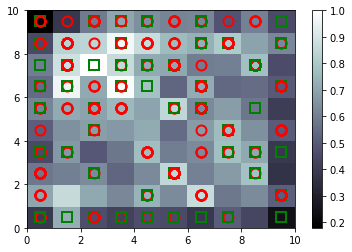

In [10]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i,j in enumerate(X):
    w = som.winner(j)
    plot(w[0]+0.5, w[1]+0.5,
        markers[Y[i]],
        markeredgecolor = colors[Y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

### Concatenating set of customers which are frauds and get approved

In [11]:
import numpy as np
mapping = som.win_map(X)
frauds = np.concatenate((mapping[(1,6)], mapping[(2,7)], mapping[(3,6)], mapping[(3,8)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [12]:
for i in frauds[:,0]:
    print(i)

15678882.0
15617348.0
15671769.0
15575243.0
15750921.0
15728010.0
15627190.0
15689268.0
15607746.0
15605341.0
15649430.0
15595010.0
15790254.0
15748552.0
15757467.0
15801441.0
15815443.0
15748432.0
15699963.0
15771856.0
15696287.0
15698749.0
15687688.0
15789611.0
15738487.0
15649160.0
15781875.0
15809837.0
15621244.0
15632789.0
15761554.0
15811690.0
15815095.0
15720725.0
15694677.0
15772941.0
15759387.0
15698522.0
15704081.0
15597536.0
15671582.0
15591360.0
15722479.0
15730360.0
15592326.0
15703177.0
15733602.0
15693382.0
15752601.0
15632669.0


# Part 2: Supervised Learning

## Data Preprocessing

### Features

In [13]:
features = dataset.iloc[:,1:].values

### Creating target variable (whether a customer is fraud or not as analysed by unsupervised learning)

In [14]:
is_fraud = np.zeros(len(dataset))

In [15]:
for i in range(len(dataset)):
    if dataset['CustomerID'][i] in frauds:
        is_fraud[i] = 1
print(is_fraud)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.

### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
features = scale.fit_transform(features)

## Building ANN

In [18]:
import tensorflow as tf

In [19]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 3, activation = 'relu'))

In [20]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [21]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training

In [22]:
ann.fit(features, is_fraud, batch_size = 3, epochs = 10)

Epoch 1/10
230/230 [==============================] - 0s 1ms/step - loss: 0.7651 - accuracy: 0.5551
Epoch 2/10
230/230 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.8304
Epoch 3/10
230/230 [==============================] - 0s 984us/step - loss: 0.4287 - accuracy: 0.9029
Epoch 4/10
230/230 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.9145
Epoch 5/10
230/230 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.9217
Epoch 6/10
230/230 [==============================] - 0s 945us/step - loss: 0.2745 - accuracy: 0.9232
Epoch 7/10
230/230 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.9261
Epoch 8/10
230/230 [==============================] - 0s 1ms/step - loss: 0.2281 - accuracy: 0.9275
Epoch 9/10
230/230 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.9275
Epoch 10/10
230/230 [==============================] - 0s 1ms/step - loss: 0.2006 - accuracy: 0.

### Predicting the probability of fraud for each customer

In [23]:
ypred = ann.predict(features)

In [24]:
ypred = np.concatenate((dataset.iloc[:,0:1].values, ypred), axis = 1)
ypred = ypred[ypred[:, 1].argsort()]

In [25]:
ypred

array([[1.56458200e+07, 6.40243292e-04],
       [1.55681620e+07, 7.29322433e-04],
       [1.57163470e+07, 7.46488571e-04],
       ...,
       [1.56921370e+07, 4.32148188e-01],
       [1.56987490e+07, 4.33488369e-01],
       [1.57729410e+07, 5.18322825e-01]])